Кластерный анализ (метод К-средних): 1) загрузите данные из прилагаемого архива (там есть описание данных, данные для обучения и данные для тестирования).         

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("data\CompleteResponses.csv")
df

,salary,age,elevel,car,zipcode,credit,brand
0,119806.54480,45,0,14,4,442037.71130,0
1,106880.47840,63,1,11,6,45007.17883,1
2,78020.75094,23,0,15,2,48795.32279,0
3,63689.93635,51,3,6,5,40888.87736,1
4,50873.61880,20,3,14,4,352951.49770,0
...,...,...,...,...,...,...,...
9893,87580.91422,75,1,18,8,282511.90950,1
9894,129181.38200,75,2,7,4,384871.36390,1
9895,97828.08884,66,2,15,0,399446.69620,1
9896,20000.00000,24,1,14,1,223204.64950,1


2) Уберите в данных целевой признак.

In [22]:
y = df["brand"]
X = df.drop("brand", axis = 1)
X

,salary,age,elevel,car,zipcode,credit
0,119806.54480,45,0,14,4,442037.71130
1,106880.47840,63,1,11,6,45007.17883
2,78020.75094,23,0,15,2,48795.32279
3,63689.93635,51,3,6,5,40888.87736
4,50873.61880,20,3,14,4,352951.49770
...,...,...,...,...,...,...
9893,87580.91422,75,1,18,8,282511.90950
9894,129181.38200,75,2,7,4,384871.36390
9895,97828.08884,66,2,15,0,399446.69620
9896,20000.00000,24,1,14,1,223204.64950


3) Выполните нормализацию признаков.

In [23]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()
col = X.columns
res = min_max.fit_transform(X)
min_max_df = pd.DataFrame(res,columns=col)
min_max_df

,salary,age,elevel,car,zipcode,credit
0,0.767743,0.416667,0.00,0.684211,0.500,0.884075
1,0.668311,0.716667,0.25,0.526316,0.750,0.090014
2,0.446313,0.050000,0.00,0.736842,0.250,0.097591
3,0.336076,0.516667,0.75,0.263158,0.625,0.081778
4,0.237489,0.000000,0.75,0.684211,0.500,0.705903
...,...,...,...,...,...,...
9893,0.519853,0.916667,0.25,0.894737,1.000,0.565024
9894,0.839857,0.916667,0.50,0.315789,0.500,0.769743
9895,0.598678,0.766667,0.50,0.736842,0.000,0.798893
9896,0.000000,0.066667,0.25,0.684211,0.125,0.446409


4) Постройте дендограмму методом дальнего соседа - оцените предполагаемое количество кластеров. Совпадает ли это количество с заранее известным?

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(min_max_df,"complete")
link

array([[4.32300000e+03, 4.40800000e+03, 1.39711589e-02, 2.00000000e+00],
       [3.20000000e+02, 6.28700000e+03, 2.17382529e-02, 2.00000000e+00],
       [5.87900000e+03, 8.52700000e+03, 2.36353163e-02, 2.00000000e+00],
       ...,
       [1.97890000e+04, 1.97900000e+04, 2.14789529e+00, 4.60900000e+03],
       [1.97880000e+04, 1.97910000e+04, 2.20993135e+00, 5.28900000e+03],
       [1.97920000e+04, 1.97930000e+04, 2.27970466e+00, 9.89800000e+03]])

In [25]:
link2 = linkage(X,"complete")
link2

array([[5.39400000e+03, 9.77900000e+03, 1.26237622e+01, 2.00000000e+00],
       [4.29400000e+03, 7.26400000e+03, 1.28950890e+01, 2.00000000e+00],
       [1.90000000e+03, 4.08700000e+03, 1.49425791e+01, 2.00000000e+00],
       ...,
       [1.97880000e+04, 1.97910000e+04, 2.76877949e+05, 4.58000000e+03],
       [1.97890000e+04, 1.97920000e+04, 3.78034984e+05, 6.86400000e+03],
       [1.97900000e+04, 1.97930000e+04, 5.16623655e+05, 9.89800000e+03]])

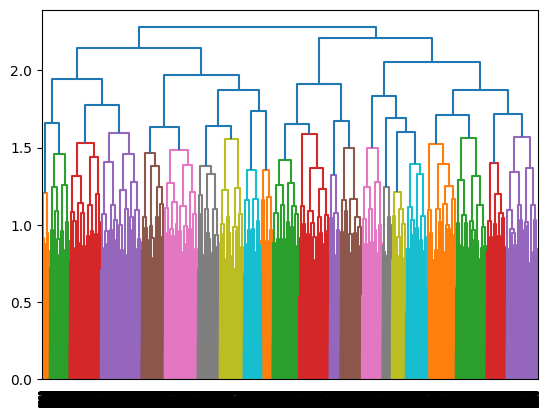

In [20]:
dn = dendrogram(link)

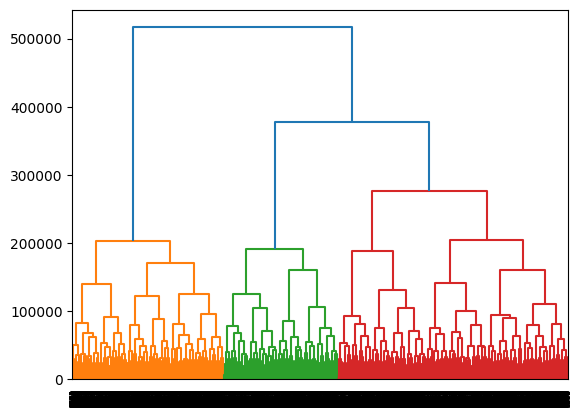

In [9]:
dn = dendrogram(link2)

если использовать не нормализированные данные, то выделяется 3 кластера

если использовать нормализированные, то ничего не понятно 

5) Используя метод главных компонент (PCA), осуществите понижение размерности данных. Визуализируйте данные в проекции на первые две главные компоненты. Сколько кластеров можно предположить по полученному рисунку?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


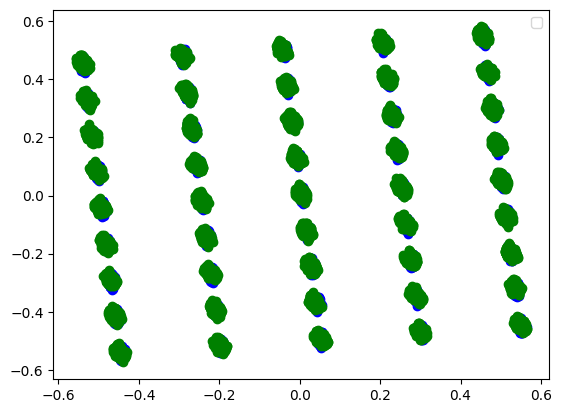

In [7]:
from sklearn import decomposition
import matplotlib.pyplot as plt


pca = decomposition.PCA(n_components=2)
X_centered = min_max_df - min_max_df.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# И нарисуем получившиеся точки в нашем новом пространстве
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro')
plt.legend(loc=0)

выглядит как 100% неправильный результат, но единсвенное, что получилось кроме этого, полностью закрашыенный экран


6) Выполните понижение размерности методом t-SNE, отобразите результат. Что можно теперь сказать о количестве кластеров?

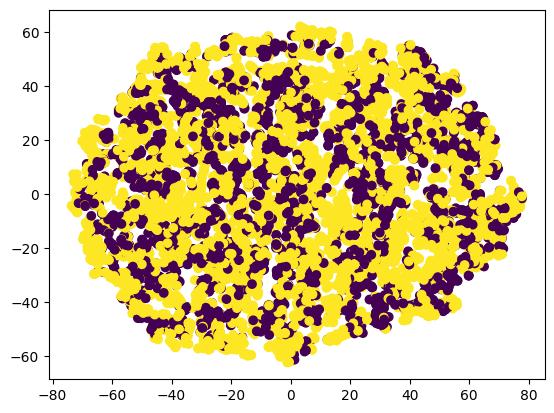

In [10]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(min_max_df)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()

что-то получилось, но опять же выразить количество кластеров не возможно

7) Используя метод "локтя" и метод К-средних определите оптимальное количество кластеров. Ответ обоснуйте.

Text(0, 0.5, 'WCSS')

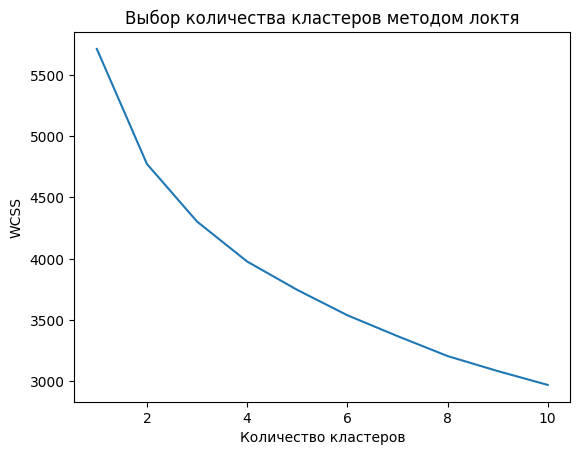

In [26]:
from sklearn.cluster import KMeans

# ошибка
wcss = []
 
for i in range(1, 11):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    kmeans.fit(min_max_df)
 
    wcss.append(kmeans.inertia_)
 
plt.plot(range(1, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

Text(0, 0.5, 'WCSS')

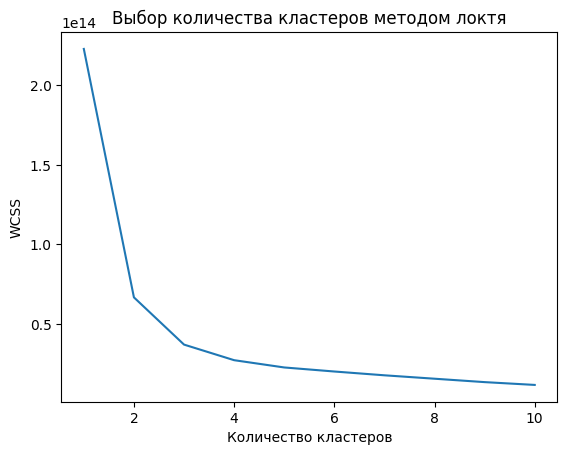

In [13]:
# ошибка
wcss = []
 
for i in range(1, 11):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    kmeans.fit(X)
 
    wcss.append(kmeans.inertia_)
 
plt.plot(range(1, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

первый график по нормализованным, второй по исходным

по методу локтя видно, что оптимальное количество кластеров 2 т.к. в этом месте самый сильный перелом графика

8) На основе предыдущих пунктов создайте модель на основе метода К-средних с оптимальным количеством кластеров. Обучите на предоставленных данных.

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=0)

kmeans.fit(min_max_df)

# Записываем номера кластеров в новый столбец
df['Кластер'] = kmeans.labels_
df.head()

,salary,age,elevel,car,zipcode,credit,brand,Кластер
0,119806.54480,45,0,14,4,442037.71130,0,0
1,106880.47840,63,1,11,6,45007.17883,1,0
2,78020.75094,23,0,15,2,48795.32279,0,0
3,63689.93635,51,3,6,5,40888.87736,1,1
4,50873.61880,20,3,14,4,352951.49770,0,1


In [39]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=0)

kmeans2.fit(X)

# Записываем номера кластеров в новый столбец
df['Кластер'] = kmeans2.labels_
df.head()

,salary,age,elevel,car,zipcode,credit,brand,Кластер
0,119806.54480,45,0,14,4,442037.71130,0,0
1,106880.47840,63,1,11,6,45007.17883,1,1
2,78020.75094,23,0,15,2,48795.32279,0,1
3,63689.93635,51,3,6,5,40888.87736,1,1
4,50873.61880,20,3,14,4,352951.49770,0,0


опять 2 варианта, на нормализированных и на исходных

тут не понял почему опять появился столбец brand, хотя я его удалял((...

9) Получите процентное соотношение верных ответов на тестовых данных.

In [40]:
from sklearn.metrics import classification_report 


test_df = pd.read_csv("data\SurveyIncomplete.csv")
y_test = test_df["brand"]
X_test = test_df.drop("brand", axis = 1)

y_pred = kmeans.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.04      0.07      4937
           1       0.01      0.95      0.02        63

    accuracy                           0.05      5000
   macro avg       0.50      0.49      0.05      5000
weighted avg       0.97      0.05      0.07      5000



In [41]:
from sklearn.metrics import classification_report 


test_df = pd.read_csv("data\SurveyIncomplete.csv")
y_test = test_df["brand"]
X_test = test_df.drop("brand", axis = 1)

y_pred = kmeans2.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.51      0.67      4937
           1       0.01      0.48      0.02        63

    accuracy                           0.51      5000
   macro avg       0.50      0.49      0.35      5000
weighted avg       0.97      0.51      0.66      5000



10) BONUS: Попробуйте выполнить кластеризацию методом DBSCAN (Density-Based Spatial Clustering of Applications with Noise, плотностной алгоритм пространственной кластеризации с присутствием шума)